In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/trevoryu/Code/data/spotify_mood_full.csv', index_col=0)

For training set:
- Add outliers
- Add useless columns
- Add NaN values
- Encode the labels

For test set:
- Normalize the test set with standard scaling


In [3]:
df

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...
277933,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1
277934,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1
277935,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2
277936,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1


In [4]:
X = df.drop("labels", axis=1)
y = df["labels"]

In [5]:
from sklearn.model_selection import train_test_split

# Use to split out a subset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=12_000, random_state=101)

In [6]:
X_test.shape, y_test.shape

((12000, 11), (12000,))

In [7]:
# Split again into real training and test data
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, stratify=y_test, test_size=2000, random_state=101)

In [8]:
X_train.shape, y_train.shape

((10000, 11), (10000,))

In [9]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [10]:
# Add the features to training 
rng = np.random.default_rng(101)

X_train["random_feature_1"] = (X_train['energy'] + X_train['instrumentalness'] + rng.random(X_train.shape[0])) / 3
X_train["random_feature_2"] = (X_train['valence'] + X_train['liveness'] + rng.random(X_train.shape[0])) / 3

In [11]:
X_train

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,random_feature_1,random_feature_2
0,188691.0,0.839,0.726,-6.302,0.1130,0.08990,0.000000,0.1100,0.158,140.152,5.988627e-07,0.556511,0.372429
1,256800.0,0.334,0.430,-6.540,0.0278,0.01860,0.005550,0.1290,0.257,100.436,1.082555e-07,0.264990,0.245851
2,112898.0,0.567,0.125,-16.686,0.0568,0.98300,0.866000,0.1110,0.319,76.442,5.031090e-07,0.591935,0.336482
3,168858.0,0.374,0.534,-8.895,0.0487,0.28100,0.000036,0.1100,0.345,149.521,2.884080e-07,0.375105,0.273208
4,303733.0,0.619,0.972,-0.517,0.4160,0.13000,0.000000,0.7820,0.584,169.040,1.369624e-06,0.422110,0.463413
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,242293.0,0.447,0.907,-3.721,0.0361,0.00342,0.002700,0.4710,0.500,129.148,1.489932e-07,0.612548,0.396725
9996,163467.0,0.751,0.629,-7.299,0.0368,0.83500,0.000000,0.4500,0.962,113.238,2.251219e-07,0.466105,0.777941
9997,284707.0,0.774,0.425,-12.745,0.2800,0.06370,0.000031,0.0730,0.541,67.679,9.834672e-07,0.155244,0.207193
9998,228200.0,0.204,0.273,-19.283,0.0406,0.91800,0.958000,0.1440,0.307,149.402,1.779141e-07,0.724853,0.288854


In [12]:
# Also transform the spec_rate and duration features into log scale
X_train["log_spec_rate"] = np.log(X_train["spec_rate"] + 1e-7)
X_test["log_spec_rate"] = np.log(X_test["spec_rate"] + 1e-7)

X_train["log_duration"] = np.log(X_train["duration (ms)"])
X_test["log_duration"] = np.log(X_test["duration (ms)"])

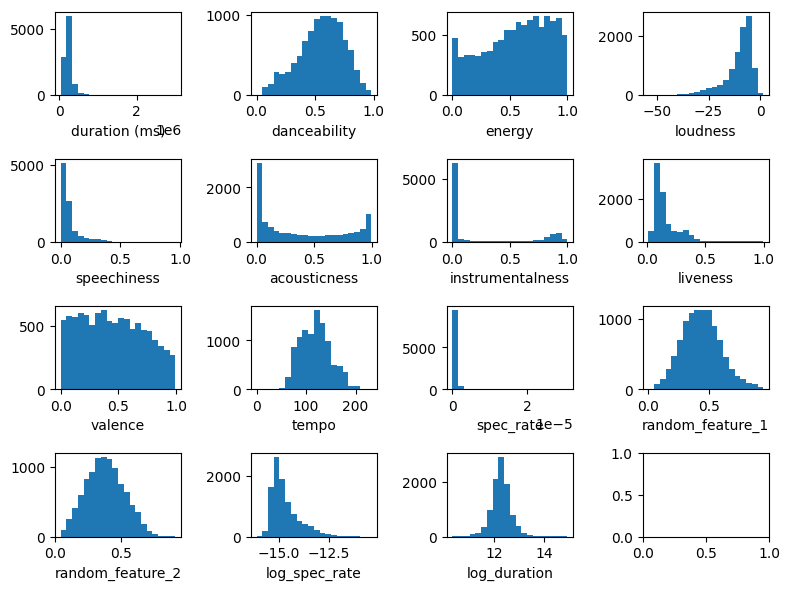

In [13]:
# Plotting the distribution
fig, axs = plt.subplots(4, 4, figsize=(8, 6))

feature_cols = X_train.columns
for col, ax in zip(feature_cols, axs.flatten()):
    ax.hist(X_train[col].values, bins=20)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

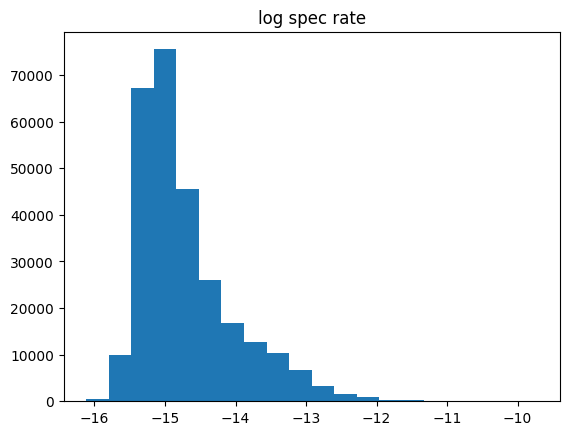

In [14]:
plt.hist(np.log(df["spec_rate"] + 1e-7), bins=20)
plt.title("log spec rate")
plt.show()

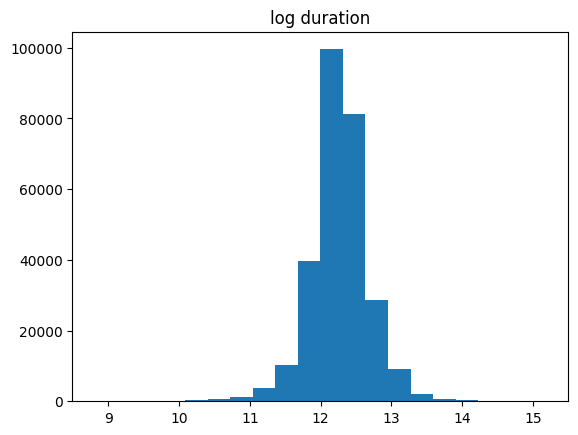

In [15]:
plt.hist(np.log(df["duration (ms)"]), bins=20)
plt.title("log duration")
plt.show()

In [16]:
# Add some outlier values (e.g. negative, above 1) to some features
outlier_cols = ["energy", "acousticness", "valence"]
num_outliers = 10

for col in outlier_cols:
    outlier_inds = rng.choice(X_train.shape[0], size=num_outliers, replace=False)
    outlier_vals = rng.choice([-1, -2, 5, 7], size=num_outliers) + 0.01 * rng.random(num_outliers)
    X_train.loc[outlier_inds, col] = outlier_vals

In [17]:
X_train[outlier_cols]

,energy,acousticness,valence
0,0.726,0.08990,0.158
1,0.430,0.01860,0.257
2,0.125,0.98300,0.319
3,0.534,0.28100,0.345
4,0.972,0.13000,0.584
...,...,...,...
9995,0.907,0.00342,0.500
9996,0.629,0.83500,0.962
9997,0.425,0.06370,0.541
9998,0.273,0.91800,0.307


In [18]:
outlier_inds = []
for col in outlier_cols:
    mask = (X_train[col] < 0) | (X_train[col] > 1)
    outlier_inds.extend(X_train[mask].index.tolist())

In [19]:
len(outlier_inds)

30

In [20]:
# Add some NaN values to some features
nan_cols = ["tempo", "instrumentalness", "speechiness"]
num_nans = 10
for col in nan_cols:
    nan_inds = rng.choice(X_train.shape[0], size=num_nans, replace=False)
    X_train.loc[nan_inds, col] = np.NaN

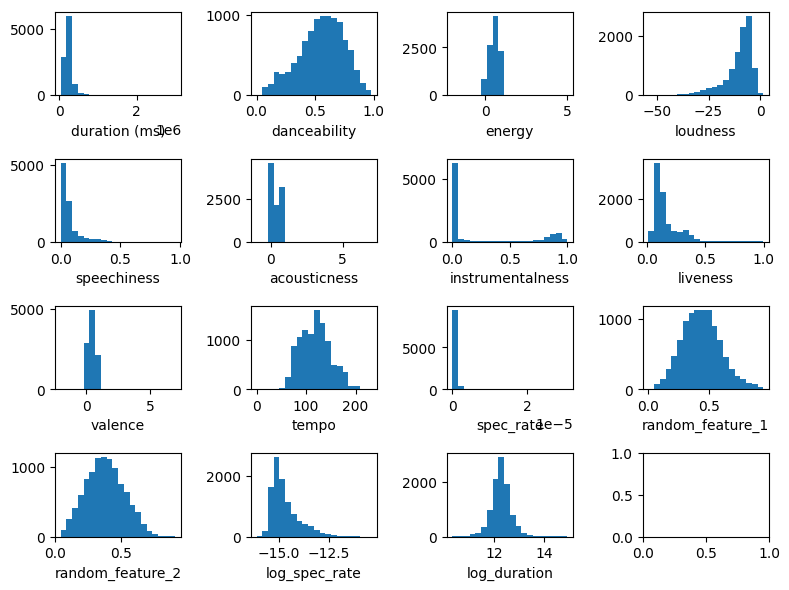

In [21]:
# Plotting the distribution
fig, axs = plt.subplots(4, 4, figsize=(8, 6))

for col, ax in zip(feature_cols, axs.flatten()):
    ax.hist(X_train[col].values, bins=20)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

In [22]:
# Convert y_train into categorical
mapping = {
    0: "sad",
    1: "happy",
    2: "energetic",
    3: "calm"
}

y_train = y_train.apply(lambda x: mapping[x])

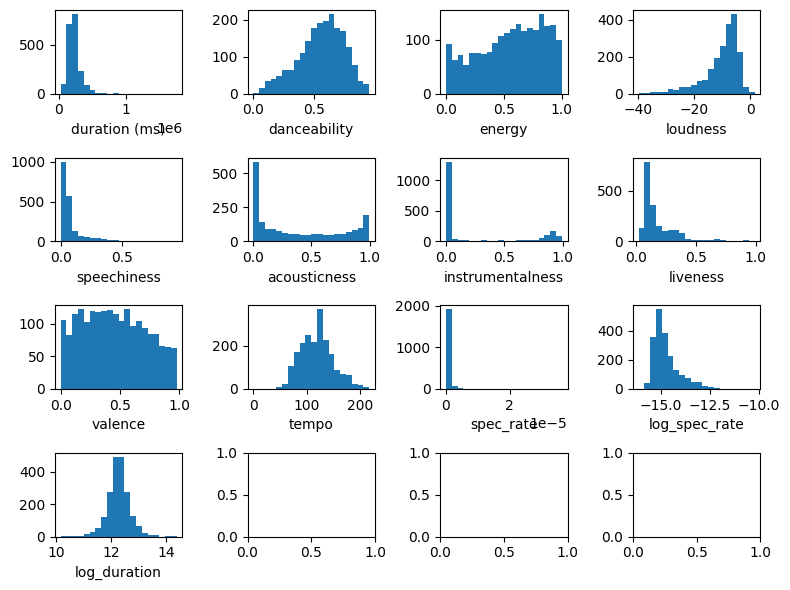

In [23]:
# Scale cols in test data
# First, plot dists
fig, axs = plt.subplots(4, 4, figsize=(8, 6))

feature_cols = X_test.columns
for col, ax in zip(feature_cols, axs.flatten()):
    ax.hist(X_test[col].values, bins=20)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
X_test = scaler.fit_transform(X_test)

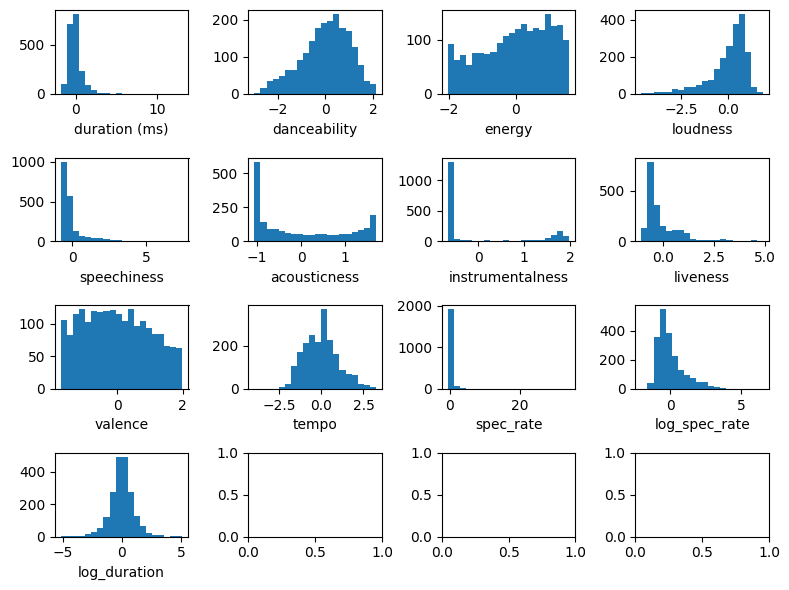

In [25]:
# First, plot dists after scaling
fig, axs = plt.subplots(4, 4, figsize=(8, 6))

feature_cols = X_test.columns
for col, ax in zip(feature_cols, axs.flatten()):
    ax.hist(X_test[col].values, bins=20)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

In [26]:
# Removing cols for saving the data

X_train = X_train.drop(["spec_rate", "duration (ms)"], axis=1)
X_test = X_test.drop(["spec_rate", "duration (ms)"], axis=1)

col_order_train = sorted(X_train.columns)
col_order_test = sorted(X_test.columns)
X_train = X_train[col_order_train]
X_test = X_test[col_order_test]

In [27]:
X_train.head()

,acousticness,danceability,energy,instrumentalness,liveness,log_duration,log_spec_rate,loudness,random_feature_1,random_feature_2,speechiness,tempo,valence
0,0.0899,0.839,0.726,0.000000,0.110,12.147866,-14.173812,-6.302,0.556511,0.372429,0.1130,140.152,0.158
1,0.0186,0.334,0.430,0.005550,0.129,12.456053,-15.384500,-6.540,0.264990,0.245851,0.0278,100.436,0.257
2,0.9830,0.567,0.125,0.866000,0.111,11.634240,-14.321168,-16.686,0.591935,0.336482,0.0568,76.442,0.319
3,0.2810,0.374,0.534,0.000036,0.110,12.036813,-14.761209,-8.895,0.375105,0.273208,0.0487,149.521,0.345
4,0.1300,0.619,0.972,0.000000,0.782,12.623904,-13.430504,-0.517,0.422110,0.463413,0.4160,169.040,0.584


In [28]:
X_test.head()

,acousticness,danceability,energy,instrumentalness,liveness,log_duration,log_spec_rate,loudness,speechiness,tempo,valence
0,1.688379,-0.969182,-2.015560,1.831892,-0.720888,-1.224523,0.023370,-4.330251,-0.417876,-1.670009,-0.768619
1,1.201873,-0.749425,-1.114305,-0.655007,3.305857,1.990406,0.486308,-1.693653,1.217423,-0.774661,-0.502506
2,-1.056486,-0.727986,1.280771,-0.165083,-0.715990,-0.506066,0.121464,0.275515,-0.251574,0.312147,0.162778
3,-0.431793,0.333279,0.490829,-0.655007,0.250747,0.120468,-0.879490,0.551495,-0.532208,0.692430,0.645583
4,0.859107,-0.288472,0.656752,-0.654435,-0.775990,-0.511439,-0.050580,0.762621,-0.327796,2.367169,1.386899


In [29]:
# Save the data
import pickle

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

data = {
    "df_train": df_train, 
    "df_test": df_test
}

with open("../data/data_preprocessing_activity.pkl", "wb") as f:
    pickle.dump(data, f)